In [12]:
import os
import numpy
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils import load_img, img_to_array
from sklearn.model_selection import StratifiedKFold

IMAGE_DIMENSION = 128
BATCH_SIZE = 32
FILTERS = 32
POOL_SIZE = (2, 2)
FIELD_SIZE = 3
ACTIVATION_FUNCTION = "relu"
DROPOUT = 0.3
UNITS = 256

def create_model():
    model = Sequential()
    model.add(Conv2D(FILTERS, FIELD_SIZE, input_shape=(IMAGE_DIMENSION, IMAGE_DIMENSION, 3), activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(MaxPooling2D(pool_size=POOL_SIZE))
    model.add(BatchNormalization())
    model.add(Conv2D(FILTERS, FIELD_SIZE, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(MaxPooling2D(pool_size=POOL_SIZE))
    model.add(BatchNormalization())
    model.add(Conv2D(FILTERS, FIELD_SIZE, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(MaxPooling2D(pool_size=POOL_SIZE))
    model.add(BatchNormalization())
    model.add(Conv2D(FILTERS, FIELD_SIZE, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(MaxPooling2D(pool_size=POOL_SIZE))
    model.add(BatchNormalization())
    model.add(Conv2D(FILTERS, FIELD_SIZE, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(MaxPooling2D(pool_size=POOL_SIZE))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 4, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 2, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 4, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 2, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 4, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 2, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 4, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 2, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 4, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 2, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 4, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS // 2, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(DROPOUT))
    model.add(BatchNormalization())
    model.add(Dense(units=UNITS, activation=ACTIVATION_FUNCTION))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation="softmax"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def preprocess_images(image_paths, image_size: tuple[int, int]) -> numpy.ndarray:
    images = []
    for path in image_paths:
        image = load_img(path, target_size=image_size)
        image_to_array = img_to_array(image)
        images.append(image_to_array)
    return numpy.array(images)

IMAGE_SIZE = (IMAGE_DIMENSION, IMAGE_DIMENSION)
TRAIN_DIR = "imagensCancerMama/treino_dataset"

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_dataset = train_datagen.flow_from_directory(TRAIN_DIR,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode="binary"
                                                )
models_accuracies: list[tuple[float, float]] = []

sk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold = 1
for train, val in sk_fold.split(train_dataset.filepaths, train_dataset.labels):
    images = numpy.array(train_dataset.filepaths)
    labels = train_dataset.labels
    train_paths, val_paths = images[train], images[val]
    train_labels, val_labels = labels[train], labels[val]

    model_path = f"model_fold_{fold}.keras"
    best_model = ModelCheckpoint(filepath=model_path,
                                 monitor="val_accuracy",
                                 verbose=1,
                                 save_best_only=True,
                                 mode="max")

    x_train = preprocess_images(train_paths, IMAGE_SIZE)
    x_val = preprocess_images(val_paths, IMAGE_SIZE)

    y_train = numpy.array(train_labels)
    y_val = numpy.array(val_labels)
    model = create_model()

    trained_model = model.fit(x_train, y_train,
              epochs=308,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val),
              callbacks=[best_model],
              verbose=1)
    max_val_accuracy: float = max(trained_model.history['val_accuracy'])
    max_val_index: int = trained_model.history['val_accuracy'].index(max_val_accuracy)
    accuracy: tuple[float, float] = (max_val_accuracy, trained_model.history['accuracy'][max_val_index])
    models_accuracies.append(accuracy)
    fold += 1
best_accuracy: float = max(models_accuracies)
best_model: int = models_accuracies.index(best_accuracy) + 1
breast_cancer_classifier = load_model(f"model_fold_{best_model}.keras")

Found 529 images belonging to 2 classes.


c:\Users\favas\anaconda3\envs\cnn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/308


c:\Users\favas\anaconda3\envs\cnn\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4746 - loss: 0.8715
Epoch 1: val_accuracy improved from -inf to 0.49057, saving model to model_fold_1.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.4755 - loss: 0.8729 - val_accuracy: 0.4906 - val_loss: 0.6934
Epoch 2/308
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4624 - loss: 0.9501
Epoch 2: val_accuracy did not improve from 0.49057
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.4641 - loss: 0.9501 - val_accuracy: 0.4906 - val_loss: 0.6930
Epoch 3/308
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4823 - loss: 0.8482
Epoch 3: val_accuracy did not improve from 0.49057
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4828 - loss: 0.8468 - val_accuracy: 0.4906 - val_loss: 0.6929
Epoch 4/308
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4894 - loss: 0.8797
Epoch 4: val_accuracy did not improve from 0.49057
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.4895 - loss: 0.8

Stored 'breast_cancer_classifier' (Sequential)
Stored 'best_accuracy' (tuple)
(0.49056604504585266, 0.48949578404426575)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step

c:\Users\favas\anaconda3\envs\cnn\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Resultado da predição: 1.0
1-064.jpg
É um câncer maligno


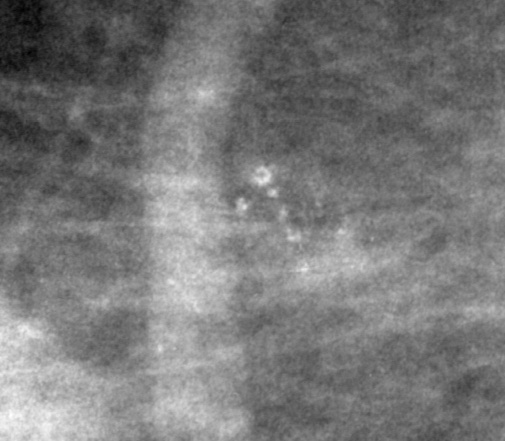

In [ ]:
import os
import numpy as np
from keras.utils import load_img, img_to_array
from IPython.display import Image

%store breast_cancer_classifier
%store best_accuracy


diretorio_path = 'imagensCancerMama/teste_dataset'
imagens = os.listdir(diretorio_path)
index = np.random.randint(0, len(imagens))
imagem = imagens[index]
imagem_path = os.path.join(diretorio_path, imagem)

print(best_accuracy)

test_image = load_img(imagem_path, target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
resultado = breast_cancer_classifier.predict(test_image)
print(f"Resultado da predição: {resultado[0][0]}")
print(imagem)
print("É um câncer maligno" if resultado[0][0] >= 0.5 else "É um câncer benigno")
Image(filename=imagem_path)
